In [114]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
data=pd.read_csv('iris.csv')
print(data.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


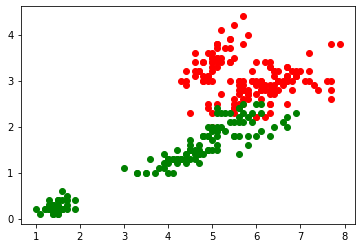

In [116]:
a=data['sepal.length']
b=data['sepal.width']
plt.scatter(a,b,color='red')
c=data['petal.length']
d=data['petal.width']
plt.scatter(c,d,color='green')
plt.show()

In [117]:
data['ans']=data['sepal.length'] *data['sepal.width']
print(data.head())

   sepal.length  sepal.width  petal.length  petal.width variety    ans
0           5.1          3.5           1.4          0.2  Setosa  17.85
1           4.9          3.0           1.4          0.2  Setosa  14.70
2           4.7          3.2           1.3          0.2  Setosa  15.04
3           4.6          3.1           1.5          0.2  Setosa  14.26
4           5.0          3.6           1.4          0.2  Setosa  18.00


In [118]:
min=data['sepal.length'].min()
max=data['sepal.length'].max()
mean=data['sepal.length'].mean()
median=data['sepal.length'].median()
mode=data['sepal.length'].mode()
std=data['sepal.length'].std()
print(min)
print(max)
print(mean)
print(mode)
print(std)

4.3
7.9
5.843333333333335
0    5.0
Name: sepal.length, dtype: float64
0.8280661279778629


In [119]:


x=data[["sepal.length","sepal.width","petal.length","petal.width"]]
y=data["variety"]

from sklearn.model_selection import train_test_split

In [120]:
# made dependent and undependent variable 


# apply in train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [121]:
print('test data',x_test.shape)
print('test data',y_test.shape)



test data (30, 4)
test data (30,)


In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
log=LogisticRegression()
log.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
# train this model
predict=log.predict(x_test)
print(predict)

['Setosa' 'Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Virginica'
 'Versicolor' 'Virginica' 'Virginica' 'Setosa' 'Virginica' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Virginica' 'Virginica'
 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Setosa' 'Setosa'
 'Virginica' 'Virginica' 'Setosa' 'Virginica' 'Versicolor' 'Virginica']


In [125]:
from sklearn.metrics import accuracy_score , precision_score 
from sklearn.metrics import confusion_matrix

In [126]:
accuracy=accuracy_score(y_test,predict)
print(accuracy)



0.9666666666666667


In [127]:
confusion_matrix=confusion_matrix(y_test,predict)
print(confusion_matrix)


[[ 8  0  0]
 [ 0  7  0]
 [ 0  1 14]]


In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [130]:
predictknn=knn.predict(x_test)
print(predictknn)

['Setosa' 'Versicolor' 'Setosa' 'Virginica' 'Virginica' 'Virginica'
 'Versicolor' 'Virginica' 'Virginica' 'Setosa' 'Virginica' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Virginica' 'Virginica'
 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Setosa' 'Setosa'
 'Virginica' 'Virginica' 'Setosa' 'Virginica' 'Versicolor' 'Virginica']


In [131]:
accuracy_score(y_test,predictknn)

0.9666666666666667

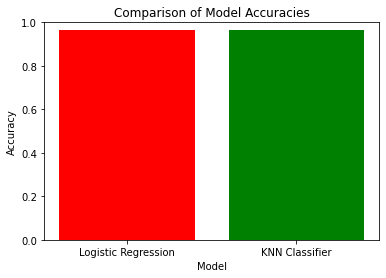

In [136]:
# Calculate accuracies
accuracy_log = accuracy_score(y_test, predict)
accuracy_knn = accuracy_score(y_test, predictknn)

# Plot the accuracies
accuracies = [accuracy_log, accuracy_knn]
models = ['Logistic Regression', 'KNN Classifier']

plt.bar(models, accuracies, color=['red', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # To keep the Y-axis between 0 and 1 for easier comparison
plt.show()